## Exercício

Utilize o dataset de Insurance com as categorias criadas abaixo, faça o treinamento do K vizinhos para as classes escolhidas usando os Scalers que acabamos de conhecer e compare a performance.

### Passo a passo

1 - Escolha um Scaler e faça o instanciamento

2 - Faça o fit transform dos dados de treino e o transform dos dados de teste

3 - Faça o fit com os dados escalados, e o target não escalado

4 - Gere a predição com os dados de teste escalados

5 - Analise as metricas usando matriz de confusão e classification report

In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
# Definindo o target
target = 'smoker'

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(target, axis = 1) , df[target], test_size=0.2, stratify=df[target], random_state=42)

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
# 1 - Escolha um Scaler e faça o instanciamento
rs = RobustScaler()

#2 - Faça o fit transform dos dados de treino e o transform dos dados de teste
    # (transform apenas nos dados não categóricos)
X_train_rs = rs.fit_transform(X_train[['age','bmi','children','charges']])
X_test_rs = rs.transform(X_test[['age','bmi','children','charges']])

In [20]:
# 3 - Faça o fit com os dados escalados, e o target não escalado
knn_clf = KNeighborsClassifier(n_neighbors=7, metric='minkowski')

knn_clf.fit(X_train_rs, y_train)

# 4 - Gere a predição com os dados de teste escalados
y_pred = knn_clf.predict(X_test_rs)

              precision    recall  f1-score   support

          no       1.00      0.98      0.99       213
         yes       0.93      0.98      0.96        55

    accuracy                           0.98       268
   macro avg       0.96      0.98      0.97       268
weighted avg       0.98      0.98      0.98       268



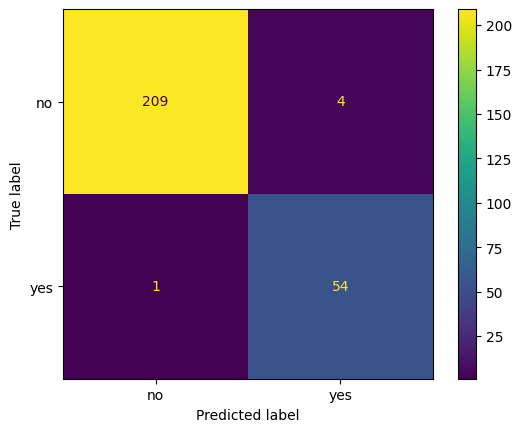

In [26]:
# 5 - Analise as metricas usando matriz de confusão e classification report
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)